In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [50]:
data = pd.read_csv("Forest_Fires_Area.csv")
data.head()

,coordinate_x,coordinate_y,month,day,moisture_shade,moisture_litter,soil_dryness,spread_rate,temperature,humidity,wind(kmh),rain(mm),area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


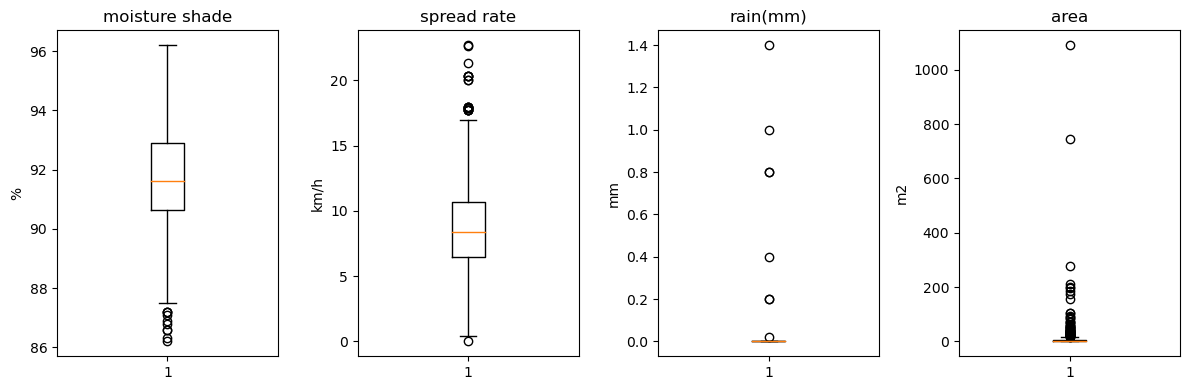

In [72]:
# Create a figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Plotting boxplots on each axis
axes[0].boxplot(data["moisture_shade"])
axes[0].set_title('moisture shade')
axes[0].set_ylabel('%')

axes[1].boxplot(data["spread_rate"])
axes[1].set_title('spread rate')
axes[1].set_ylabel('km/h')

axes[2].boxplot(data["rain(mm)"])
axes[2].set_title('rain(mm)')
axes[2].set_ylabel('mm')

axes[3].boxplot(data["area"])
axes[3].set_title('area')
axes[3].set_ylabel('m2')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [71]:
rain_idx = data["rain(mm)"].idxmax()
data.loc[rain_idx,"rain(mm)"] = data["rain(mm)"].mean()

In [62]:
data = pd.get_dummies(data,columns=["month","day"])

<Axes: >

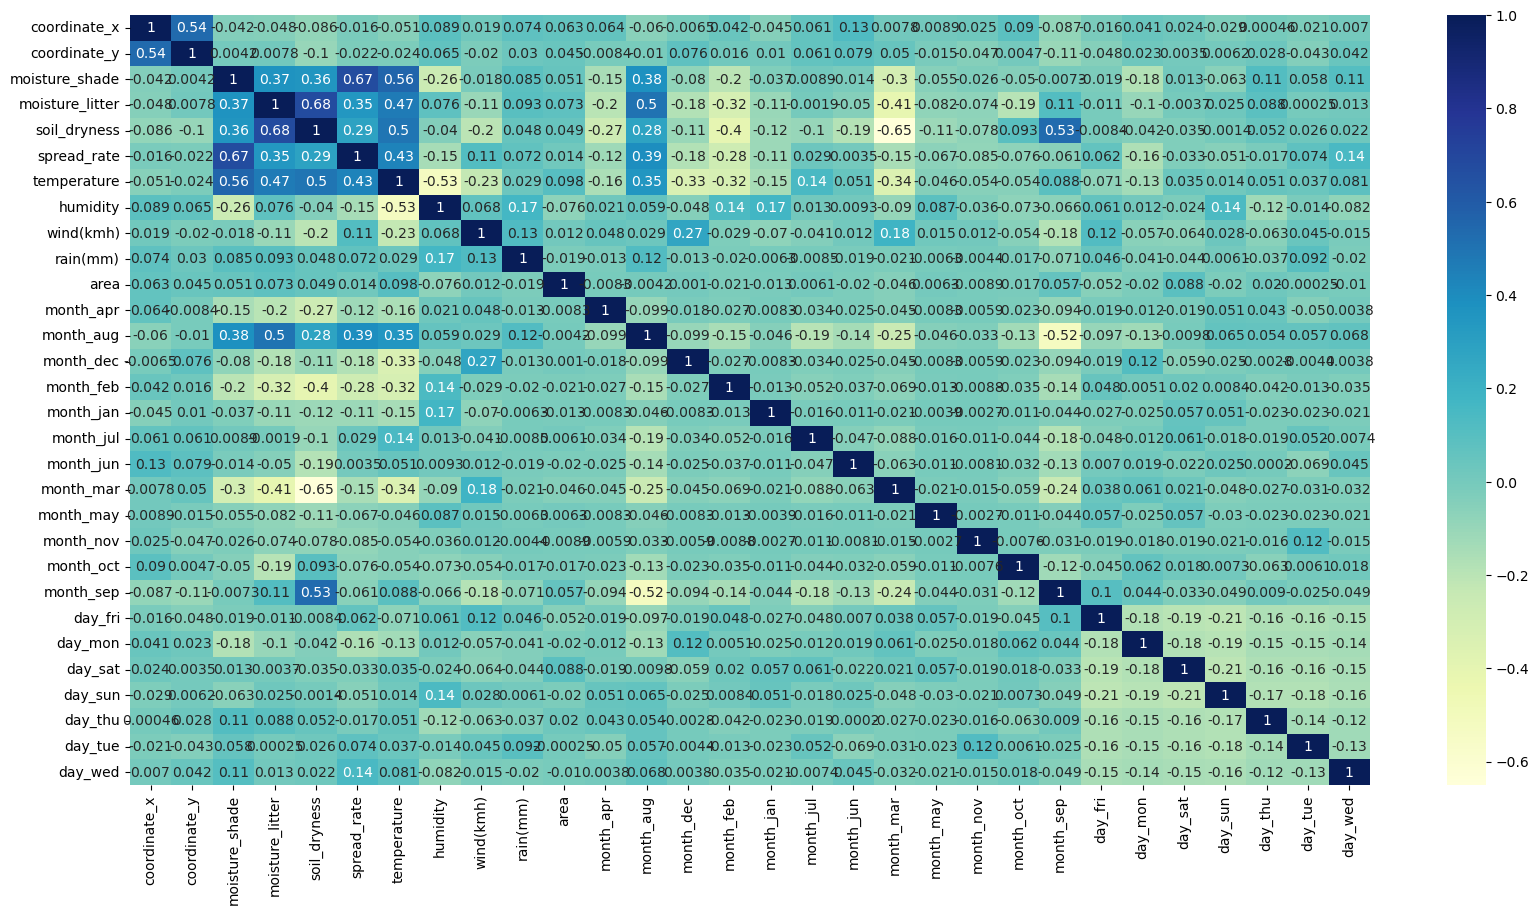

In [73]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [58]:

#Identify quartiles and IQC
Q1 = data["moisture_shade"].quantile(0.25)
Q3 = data["moisture_shade"].quantile(0.75)
IQR = Q3-Q1
threshold = Q1 - 1.5*IQR

#Replace outliers in moisture_shade witht the average moisture shade for the respective coordinates
outliers_mask = data["moisture_shade"] < threshold
data.loc[outliers_mask,"moisture_shade"] = data["moisture_shade"].mean()